# Introduction
## The Contraceptive Use Data (L)
This is the alternative version of the contraceptive use data, showing the distribution of 1607 currently married and fecund women interviewed in the Fiji Fertility Survey, according to age, education, desire for more children and current use of contraception.

This version has 32 rows corresponding to all possible covariate and response patterns, and includes a weight indicating the frequency of each combination. 

$$
\begin{array}{l}
{\text { The file has 5 columns with numeric codes: }} \\ 
{\cdot \text { age (four groups, 1=<25, 2=25-29, 3=30-39 and 4=40-49) }} \\ 
{\cdot \text { education (0=none, 1=some) }} \\
{\cdot \text { desire for more children (0=more, 1=no more) }}\\
{\cdot \text { contraceptive use (0=no, 1=yes) }} \\
{\cdot \text { frequency (number of cases in this category) }}
\end{array} 
$$


Here we choose age, education, desire for more children as features and contraceptive use as reponses

In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_stata('cuse.dta')

df['educ'] = df['educ'].map({'None': 0, 'Some': 1})
df['desire'] = df['desire'].map({'Wants no more': 1, 'Wants more': 0})
df['age'] = df['age'].map({'<25': 1,'25-29' : 2, '30-39':3, '40-49' : 4})
df['cuse'] = df['cuse'].map({'No': 0 , 'Yes':1})

n = df['n']
n = n.astype(int)
df = df.drop(['n'], axis = 1)
df1 = np.array(df)
for i,j in enumerate(n):
    df2 = pd.DataFrame([df1[i]] * (j-1), columns=['educ', 'desire', 'age', 'cuse'])
    df = df.append(df2, ignore_index=True)
print(df)


      age  cuse  desire  educ
0       1     0       0     0
1       1     1       0     0
2       1     0       1     0
3       1     1       1     0
4       1     0       0     1
5       1     1       0     1
6       1     0       1     1
7       1     1       1     1
8       2     0       0     0
9       2     1       0     0
10      2     0       1     0
11      2     1       1     0
12      2     0       0     1
13      2     1       0     1
14      2     0       1     1
15      2     1       1     1
16      3     0       0     0
17      3     1       0     0
18      3     0       1     0
19      3     1       1     0
20      3     0       0     1
21      3     1       0     1
22      3     0       1     1
23      3     1       1     1
24      4     0       0     0
25      4     1       0     0
26      4     0       1     0
27      4     1       1     0
28      4     0       0     1
29      4     1       0     1
...   ...   ...     ...   ...
1577    1     1       1     4
1578    1 

C:\Apps\Anaconda\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Here we used sklearn package to split the data

In [2]:
feature_cols = ['age', 'educ','desire']

x = df[feature_cols]
y = df['cuse']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 0)
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

C:\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[414,  26],
       [169,  34]], dtype=int64)

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label.\
In classification question instead of Mean Squared Error, we use a cost function called Cross-Entropy, also known as Log Loss. Cross-entropy loss can be divided into two separate cost functions: one for y=1 and one for y=0.

$$
\begin{array}{ll}{J(\theta)=\frac{1}{m} \sum_{i=1}^{m} \operatorname{cost}\left(h_{\theta}\left(x^{(i)}\right), y^{(i)}\right)} & {} \\ {\operatorname{cost}\left(h_{\theta}(x), y\right)=-\log \left(h_{\theta}(x)\right)} & {\text { if } y=1} \\ {\operatorname{cost}\left(h_{\theta}(x), y\right)=-\log \left(1-h_{\theta}(x)\right)} & {\text { if } y=0}\end{array}
$$
Above functions compressed into one
$$
J(\theta)=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \log \left(h_{\theta}\left(x^{(i)}\right)\right)+\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)\right]
$$
Vectorized cost function\
$$
\begin{array}{l}{h=g(X \theta)} \\ {J(\theta)=\frac{1}{m} \cdot\left(-y^{T} \log (h)-(1-y)^{T} \log (1-h)\right)}\end{array}
$$

In [3]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def predict(features, weights):
    z = np.dot(features, weights)
#     print(sigmoid(z).shape)
    return sigmoid(z)

def cost_function(features, labels, weights):
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost

For first-order gradient desent method, the derivation of the cost function is:
$$
C^{\prime}=x(s(z)-y)
$$
we update the weights:
$$
\vec{w}_{n+1}=\vec{w}_{n}-lr \nabla f\left(\vec{w}_{n}\right)
$$

For second-order gradient desent method(Newton's method)
$$
H_{\ell(\hat{\theta})}=\left[\begin{array}{c}{\frac{\partial^{2} \ell}{\partial \theta_{1}^{2}} \frac{\partial^{2} \ell}{\partial \theta_{1} \partial \theta_{2}}} \\ {\frac{\partial^{2} \ell}{\partial \theta_{2} \partial \theta_{1}} \frac{\partial^{2} \ell}{\partial \theta_{2}^{2}}}\end{array}\right]
$$
$$
\nabla \ell=\left\langle\begin{array}{c}{\sum_{i=1}^{n}\left(y_{i}-h_{\theta}\left(x_{i}\right)\right) x_{i}} \\ {\sum_{i=1}^{n}\left(y_{i}-h_{\theta}\left(x_{i}\right)\right)}\end{array}\right\rangle
$$
$$
H_{\ell(\hat{\theta})}=\left[\begin{array}{c}{\sum_{i=1}^{n} h_{\theta}\left(x_{i}\right)\left(1-h_{\theta}\left(x_{i}\right)\right) \theta_{1} \theta_{1}, \sum_{i=1}^{n} h_{\theta}\left(x_{i}\right)\left(1-h_{\theta}\left(x_{i}\right)\right) \theta_{1}} \\ {\sum_{i=1}^{n} h_{\theta}\left(x_{i}\right)\left(1-h_{\theta}\left(x_{i}\right)\right) \theta_{1}, \sum_{i=1}^{n} h_{\theta}\left(x_{i}\right)\left(1-h_{\theta}\left(x_{i}\right)\right)}\end{array}\right]
$$
By substituting The Hessian into the Newton’s Method update step, we are left with:
$$
\theta_{n+1}=\theta_{n}+H_{\ell(\hat{\theta})}^{-1} \nabla \ell(\theta)
$$
We update the weights:
$$
\vec{w}_{n+1}=\vec{w}_{n}-H^{-1}\left(w_{n}\right) \nabla f\left(\vec{w}_{n}\right)
$$

In [4]:
def H(features, actual_label, weights):                                                         
    prediction = predict(features, weights)    
    
    d1 = (prediction * (1 - prediction)).T *   np.power(weights,2)        
    d2 = (prediction * (1 - prediction)).T *  weights        
    d3 = (prediction * (1 - prediction))                
    H = np.array([[d1, d2],[d2, d3]])                                           
    return H, np.array([[(actual_label - prediction).T * weights,                          
                     (actual_label - prediction) * 1]])  

def update_weights(features, labels, weights, lr, order):
    N = len(features)
    predictions = predict(features, weights)
    if order == 1:
        gradient = np.dot(features.T,  predictions - labels)
        gradient /= N
        gradient *= lr
        weights -= gradient
        return weights

Assign class labels (0 or 1) to our predicted probabilities.

In [5]:
def decision_boundary(prob):
    return 1 if prob >= .5 else 0

Training the data, and get optimized weights.

In [6]:
def train(features, labels, weights, lr, iters, order):
    cost_history = []
    accracy_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr,order)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        # Log Progress
        if i % 1000 == 0:
            print("iter: ",str(i) , " cost: ",str(cost))

    return weights, cost_history

Accuracy measures how correct the predictions were. \
In this case we compare predicted labels to true labels and divide by the total.

In [7]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels.T
    return 1.0 - (float(np.count_nonzero(diff)) / diff.shape[1]) 

As for the first-order gradient descent method on logistic regression, the loss is dropped significantly in the first 500 loops.

iter:  0  cost:  0.7318607944902067
iter:  1000  cost:  0.284700461694812
iter:  2000  cost:  0.1826267114615742
the accuracy of the first-order gradient descent is : 1.0


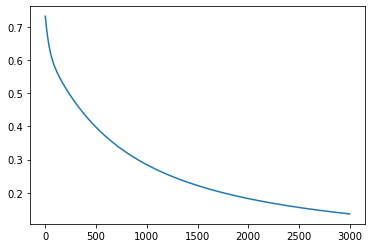

In [8]:
m = df.shape[0]
n = df.shape[1]-1
x = np.zeros((m,n))

for i,element in enumerate(feature_cols):
    x[:,i] = df[element]

y = np.zeros((m,1))
y[:,0] = df['desire']

#initialize the parameters
w = np.random.rand(n,1)
lr = 0.01
iters = 3000

w, cost_history = train(x,y,w,lr,iters,1)
predictions = predict(x, w)
predict_label = []
for i in predictions:
    predict_label.append(decision_boundary(i))
accuracy = accuracy(predict_label, y)
plt.plot(range(len(cost_history)),cost_history)
print('the accuracy of the first-order gradient descent is :',accuracy)